(lecture11:examples-variance-discrete-rv)=
# Examples of variances of random variables

Let's revisit some of the distributions we encountered in the earlier and calculate their
variances.
We will do it both analytically, and using `scipy.stats`.

## Example: Variance of a Bernoulli random variable

Take a [Bernoulli random variable](lecture09-bernoulli-distribution):

$$
X \sim \text{Bernoulli}(\theta).
$$

We have already found that this expectation is:

$$
\mu = \mathbf{E}[X] = \theta.
$$

To find the variance we are going to use [Variance Property 3](lecture11:variance-property-3).
For this we need to find the expectation of the square:

$$
\begin{split}
\mathbf{E}[X^2] &= \sum_x x^2 p(x)\\
&= 0^2 p(X=0) + 1^2 p(X=1)\\
&= \theta.
\end{split}
$$

So, we have:

$$
\mathbf{V}[X] = \mathbf{E}[X^2] - \mu^2 = \theta - \theta^2 = \theta (1 - \theta).
$$

And here is how we can do it using `scipy.stats`:




In [1]:
MAKE_BOOK_FIGURES=True

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [2]:
theta = 0.7
X = st.bernoulli(theta)

Now that we have made the random variable we can get its expectation by `X.var()`:

In [3]:
print(f'V[X] = {X.var():1.2f}')
print(f'Compare to theta * (1 - theta) = {theta * (1 - theta):1.2f}')

V[X] = 0.21
Compare to theta * (1 - theta) = 0.21


The standard deviation is just the square root of the variance:

$$
\sigma = \sqrt{\theta (1-\theta)}.
$$

In `scipy.stats` you can get it by `X.std()`:

In [4]:
print(f'std of X = {X.std():1.2f}')

std of X = 0.46


## Example: Variance of a uniform random variable

Take

$$
X \sim U([a,b]).
$$

Remember that the PDF is:

$$
p(x) = \frac{1}{b-a},
$$

when $x$ is in $[a,b]$ and zero otherwise.

We have already found the expectation and it was given by the mid-point between $a$ and $b$:

$$
\mu = \mathbf{E}[X] = \frac{a+b}{2}.
$$

To find the variance, we first need to find the expectation of the square:

$$
\begin{split}
\mathbf{E}[X^2] &= \int x^2p(x)dx\\
&= \int_a^b x^2 \frac{1}{b-a}dx\\
&= \frac{1}{b-a}\frac{x^3}{3}|_a^b\\
&= \frac{1}{b-a}\frac{b^3 - a^3}{3}\\
&=\frac{b^3 - a^3}{3(b-a)}
\end{split}
$$

You can simplify this even more, but we won't bother.
Now, put everything together:

$$
\begin{split}
\mathbf{V}[X] &= \mathbf{E}[X^2] - \mu^2\\
&= \frac{b^3 - a^3}{3(b-a)} - \frac{(a+b)^2}{4}\\
&= \frac{4\cdot (b^3 - a^3)}{4\cdot 3(b-a)} - \frac{3(b-a)\cdot (a+b)^2}{3(b-a)\cdot 4}\\
&= \frac{4\cdot (b^3 - a^3) - 3(b-a)\cdot (a+b)^2}{12(b-a)}\\
&= \frac{4b^3 - 4a^3 - 3(b-a)(a^2 + 2ab+b^2)}{12(b-a)}\\
&= \frac{4b^3 - 4a^3 -3a^2b -6ab^2 - 3b^3 + 3a^3 + 6a^2b + 3ab^2}{12(b-a)}\\
&= \frac{b^3 - a^3 -3a^2b -6ab^2 + 6a^2b + 3ab^2}{12(b-a)}\\
&= \frac{(b-a)^3}{12(b-a)}\\
&= \frac{(b-a)^2}{12}.
\end{split}
$$

If you remember your basics mechanics course, this is the second area moment of inertia of a beam about its center of mass.
This is not an accident.
Mathematically, the variance and the second area moments are exactly the same integrals.

Let's do it also on `scipy.stats`:

In [5]:
a = 0
b = 5
X = st.uniform(a, b)
print(f'V[X] = {X.var():1.2f}')
print(f'Compare to theoretical answer = {(b - a) ** 2 / 12:1.2f}')

V[X] = 2.08
Compare to theoretical answer = 2.08


## Example: Variance of a Categorical random variable

Take a [Categorical random variable](lecture09:the-categorical-distribution):

$$
X \sim \text{Categorical}(0.1, 0.3, 0.4, 0.2).
$$

The expectation is:

$$
\mu = \mathbf{E}[X] = 1.7.
$$

Again, we are going to invoke [Variance Property 3](lecture11:variance-property-3).
We need the expectation of the square:

$$
\begin{split}
\mathbf{E}[X^2] &= \sum_x x^2 p(x)\\
&= 0^2\cdot p(X=0) + 1^2 \cdot p(X=1) + 2^2\cdot p(X=2) + 3^2 \cdot p(X=3)\\
&= 0 \cdot 0.1 + 1 \cdot 0.3 + 4 \cdot 0.4 + 9 \cdot 0.2\\
&= 3.7.
\end{split}
$$

So, we have:

$$
\mathbf{V}[X] = \mathbf{E}[X^2] - \mu^2 = 3.7 - 1.7^2 = 0.81.
$$

Here is how we can find it with Python:

In [6]:
import numpy as np
# The values X can take
xs = np.arange(4)
print('X values: ', xs)
# The probability for each value
ps = np.array([0.1, 0.3, 0.4, 0.2])
print('X probabilities: ', ps)
# And the expectation in a single line
E_X = np.sum(xs * ps)
# The expectation of the square
E_X2 = np.sum(xs ** 2 * ps)
# The variance
V_X = E_X2 - E_X ** 2
print(f'V[X] = {V_X:1.2f}')

X values:  [0 1 2 3]
X probabilities:  [0.1 0.3 0.4 0.2]
V[X] = 0.81


Alternatively, we could use `scipy.stats`:

In [7]:
X = st.rv_discrete(name='X', values=(xs, ps))
print(f'V[X] = {X.var():1.2f}')

V[X] = 0.81


The standard deviation is:

In [8]:
print(f'std of X = {X.std():1.2f}')

std of X = 0.90


Let's now make a plot. I am going to plot the the PMF of $X$ and I am going to mark the position of the expected value along with:

+ the expected value minus two standard deviations,
+ the expected value plus two standard deviations.

Let's see what we get:

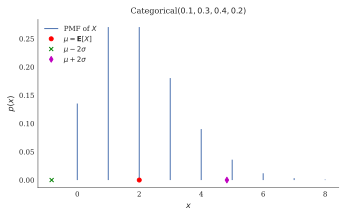

In [ ]:
fig, ax = make_full_width_fig()
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
mu = X.expect()
std = X.std()
low = mu - 2 * std
up = mu + 2 * std
ax.plot(mu, 0, 'ro', label=r'$\mu = \mathbf{E}[X]$')
ax.plot(low, 0, 'gx', label=r'$\mu - 2\sigma$')
ax.plot(up, 0, 'md', label=r'$\mu + 2\sigma$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title('Categorical$(0.1, 0.3, 0.4, 0.2)$')
plt.legend(loc='upper left')
save_for_book(fig, 'ch11.fig9')

We see that, in this case, going two standard deviations below the mean and two standard deviations above the mean captures pretty much all the values.

## Example: Variance of a Binomial random variable

Take a [Binomial random variable](lecture09:the-binomial-distribution):

$$
X\sim \text{Binomial}(n, \theta).
$$

It is not very easy to find the variance of this one.
But it is given by the following formula:

$$
\mathbf{V}[X] = n\theta(1-\theta).
$$

If you notice, it is basically $n$ times the variance of the Bernoulli.
This is not accident. The Binomial is actually the sum of $n$ independent Bernoulli's.
But we do not know the mathematics to deal with this yet.

Here is how we can get it with `scipy.stats`:

In [18]:
n = 5    
theta = 0.6
X = st.binom(n, theta)
print(f'E[X] = {X.var():1.2f}')
print(f'Compare to n * theta = {n * theta * (1 - theta):1.2f}')

E[X] = 1.20
Compare to n * theta = 1.20


Let's plot the same things we plotted for the categorical:

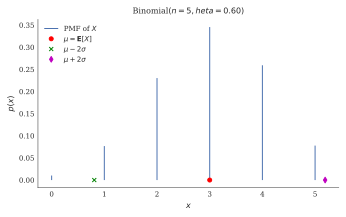

In [19]:
fig, ax = make_full_width_fig()
xs = np.arange(n+1)
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
mu = X.expect()
std = X.std()
low = mu - 2 * std
up = mu + 2 * std
ax.plot(mu, 0, 'ro', label=r'$\mu = \mathbf{E}[X]$')
ax.plot(low, 0, 'gx', label=r'$\mu - 2\sigma$')
ax.plot(up, 0, 'md', label=r'$\mu + 2\sigma$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(f'Binomial$(n={n:d}, \theta={theta:1.2f})$')
plt.legend(loc='upper left')
save_for_book(fig, 'ch11.fig10')

### Questions

+ Rerun the case of the Binomial with $n=50$. Does the shape of the PMF you get look familiar?

## Example: Variance of a Poisson random variable

Take [Poisson random variable](lecture09:the-poisson-distribution):

$$
X\sim \operatorname{Poisson}(\lambda).
$$

Finding this variance is also non-trival.
But it is:

$$
\mathbf{V}[X] = \lambda.
$$

Wait a second!!! Didn't we say that the variance has the square units of $X$.
If you paid attention the expectation of $X$ was also $\lambda$.
How is it even possible?
Well, it is because $X$ has no units... It's just numbers counting events.

Let's also do it in `scipy.stats`:

In [13]:
lam = 2.0
X = st.poisson(lam)
print(f'E[X] = {X.var():1.2f}')

E[X] = 2.00


And let's visualize everything together like before:

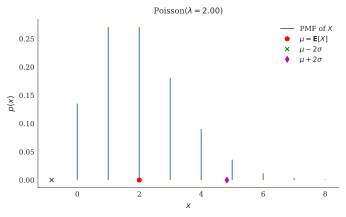

In [15]:
fig, ax = make_full_width_fig()
xs = np.arange(X.ppf(0.9999)) # I will explain this later
ax.vlines(xs, 0, X.pmf(xs), label='PMF of $X$')
mu = X.expect()
std = X.std()
low = mu - 2 * std
up = mu + 2 * std
ax.plot(mu, 0, 'ro', label=r'$\mu = \mathbf{E}[X]$')
ax.plot(low, 0, 'gx', label=r'$\mu - 2\sigma$')
ax.plot(up, 0, 'md', label=r'$\mu + 2\sigma$')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
ax.set_title(f'Poisson$(\\lambda={lam:1.2f})$')
plt.legend(loc='upper right')
save_for_book(fig, 'ch11.fig11')

### Question

+ Rerun the case for the Poisson with a rate parameter $\lambda = 50$. Does the shape look familiar?